# Proyek Analisis Data: Bike Sharing
- Nama: Ivan Yurdean
- Email: ivanyurdean50@gmail.com
- Id Dicoding: 

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : 
Pada musim apa sewa sepeda harian lebih banyak digunakan ?

- Pertanyaan 2 : 
Bagaimana Jumlah sewa sepeda harian diantara hari kerja atau hari libur ?


## Menyiapkan semua library yang dibuthkan

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [16]:
bike_hour=pd.read_csv("E:/Data Science IDCamp/Tugas proyek/Bike Sharing/hour.csv")
bike_day=pd.read_csv("E:/Data Science IDCamp/Tugas proyek/Bike Sharing/day.csv")

### Assessing Data

Melihat info dari bike_hour dan bike_day di setiap kolom 

In [17]:
bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [18]:
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Menampilkan 5 buah (default) data teratas

In [19]:
bike_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [20]:
bike_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Menampilkan jumlah kolom dan baris dari dataset

In [21]:
bike_hour.shape

(17379, 17)

In [22]:
bike_day.shape

(731, 16)

Informasi statistik dari dataset

In [23]:
bike_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [24]:
bike_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Melihat info di setiap kolom

In [25]:
bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [26]:
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Menyatukan bike_hour dengan bike_day, serta melakukan assesing data singkat

In [27]:
bike_sharing=bike_day.merge(bike_hour, on='dteday', how='inner', suffixes=('_daily','hourly'))
print(bike_sharing.shape)
bike_sharing.describe()
bike_sharing.loc[bike_sharing["dteday"].isnull()]
bike_sharing.head()

(17379, 32)


,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekdayhourly,workingdayhourly,weathersithourly,temphourly,atemphourly,humhourly,windspeedhourly,casualhourly,registeredhourly,cnthourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Cleaning Data

Cek banyaknya data null di dataset (dari hasil terlihat bahwa tidak ada data missing value)

In [28]:
bike_sharing.isnull().sum()

instant_daily       0
dteday              0
season_daily        0
yr_daily            0
mnth_daily          0
holiday_daily       0
weekday_daily       0
workingday_daily    0
weathersit_daily    0
temp_daily          0
atemp_daily         0
hum_daily           0
windspeed_daily     0
casual_daily        0
registered_daily    0
cnt_daily           0
instanthourly       0
seasonhourly        0
yrhourly            0
mnthhourly          0
hr                  0
holidayhourly       0
weekdayhourly       0
workingdayhourly    0
weathersithourly    0
temphourly          0
atemphourly         0
humhourly           0
windspeedhourly     0
casualhourly        0
registeredhourly    0
cnthourly           0
dtype: int64

Cek duplikasi data yang ada pada bike_sharing

In [29]:
bike_sharing.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

Mencari nilai korelasi setiap data

In [30]:
numerical_columns=["holiday_daily","weekday_daily","workingday_daily","weathersit_daily","temp_daily","atemp_daily","season_daily","windspeed_daily","cnt_daily"]
correlation=bike_sharing[numerical_columns].corr()
print(correlation)

                  holiday_daily  weekday_daily  workingday_daily  \
holiday_daily          1.000000      -0.102088         -0.252471   
weekday_daily         -0.102088       1.000000          0.035955   
workingday_daily      -0.252471       0.035955          1.000000   
weathersit_daily      -0.033653       0.035082          0.057122   
temp_daily            -0.028856      -0.001894          0.058460   
atemp_daily           -0.032770      -0.009333          0.057839   
season_daily          -0.009585      -0.002335          0.013743   
windspeed_daily        0.006319       0.018226         -0.018746   
cnt_daily             -0.070344       0.064204          0.068216   

                  weathersit_daily  temp_daily  atemp_daily  season_daily  \
holiday_daily            -0.033653   -0.028856    -0.032770     -0.009585   
weekday_daily             0.035082   -0.001894    -0.009333     -0.002335   
workingday_daily          0.057122    0.058460     0.057839      0.013743   
weathersit_

Melihat nilai nunique terhadap season_daily dan weathersit_daily

In [31]:
bike_sharing.groupby(by="season_daily").cnt_daily.nunique()

season_daily
1    179
2    182
3    188
4    176
Name: cnt_daily, dtype: int64

In [32]:
bike_sharing.groupby(by="weathersit_daily").cnt_daily.nunique()

weathersit_daily
1    451
2    243
3     21
Name: cnt_daily, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa sewa sepeda harian lebih banyak digunakan ?

Text(0, 0.5, 'Jumlah sewa harian')

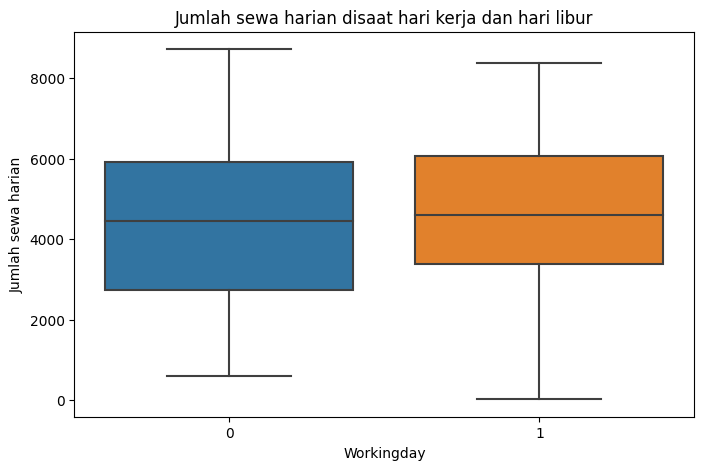

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(x="workingday_daily",y="cnt_daily",data=bike_sharing)
plt.title("Jumlah sewa harian disaat hari kerja dan hari libur")
plt.xlabel("Workingday")
plt.ylabel("Jumlah sewa harian")

### Pertanyaan 2: Bagaimana Jumlah sewa sepeda harian diantara hari kerja atau hari libur ?


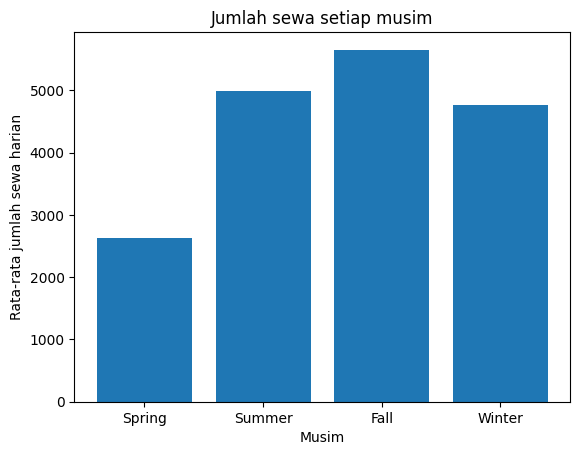

In [34]:
musim=bike_sharing.groupby('season_daily')['cnt_daily'].mean()
nama_musim=['Spring','Summer','Fall','Winter']
plt.bar(nama_musim,musim)
plt.xlabel('Musim')
plt.ylabel('Rata-rata jumlah sewa harian')
plt.title('Jumlah sewa setiap musim')
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Sepeda yang tersewakan lebih banyak disaat hari kerja dari pada hari libur
- Conclution pertanyaan 2 : Pada musim Fall banyak penyewaan harian ketimbang pada musim-musim lainnya